In [1]:
# install libraries for colab
!pip install librosa PySoundFile

You should consider upgrading via the '/mnt/b/projects/voice_recognition_practice/.venv/bin/python -m pip install --upgrade pip' command.


In [2]:
# donwload voice dataset
!wget http://ss-takashi.sakura.ne.jp/corpus/jsut_ver1.1.zip

--2022-09-29 15:35:07--  http://ss-takashi.sakura.ne.jp/corpus/jsut_ver1.1.zip
Resolving ss-takashi.sakura.ne.jp (ss-takashi.sakura.ne.jp)... 219.94.162.51
Connecting to ss-takashi.sakura.ne.jp (ss-takashi.sakura.ne.jp)|219.94.162.51|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2688749844 (2.5G) [application/zip]
Saving to: ‘jsut_ver1.1.zip’

jsut_ver1.1.zip     100%[===================>]   2.50G  8.47MB/s    in 4m 58s  

2022-09-29 15:40:05 (8.59 MB/s) - ‘jsut_ver1.1.zip’ saved [2688749844/2688749844]



In [3]:
# unzip donwloaded file
!unzip jsut_ver1.1.zip

Archive:  jsut_ver1.1.zip
   creating: jsut_ver1.1/
   creating: jsut_ver1.1/precedent130/
  inflating: jsut_ver1.1/precedent130/transcript_utf8.txt  
   creating: jsut_ver1.1/precedent130/wav/
  inflating: jsut_ver1.1/precedent130/wav/PRECEDENT130_049.wav  
  inflating: jsut_ver1.1/precedent130/wav/PRECEDENT130_113.wav  
  inflating: jsut_ver1.1/precedent130/wav/PRECEDENT130_073.wav  
  inflating: jsut_ver1.1/precedent130/wav/PRECEDENT130_099.wav  
  inflating: jsut_ver1.1/precedent130/wav/PRECEDENT130_027.wav  
  inflating: jsut_ver1.1/precedent130/wav/PRECEDENT130_004.wav  
  inflating: jsut_ver1.1/precedent130/wav/PRECEDENT130_088.wav  
  inflating: jsut_ver1.1/precedent130/wav/PRECEDENT130_050.wav  
  inflating: jsut_ver1.1/precedent130/wav/PRECEDENT130_031.wav  
  inflating: jsut_ver1.1/precedent130/wav/PRECEDENT130_032.wav  
  inflating: jsut_ver1.1/precedent130/wav/PRECEDENT130_046.wav  
  inflating: jsut_ver1.1/precedent130/wav/PRECEDENT130_063.wav  
  inflating: jsut_ver1.1/p

In [1]:
# original sampling rate is 48kHz so we transform it to 16kHz
import os
os.makedirs("data/wav", exist_ok=True)

import librosa
import soundfile
from tqdm import tqdm
from glob import glob

orig_sr = 48000
target_sr = 16000
# it takes a lot of time, so we limit the number of processing it.
file_limit = 100
original_files = list(glob("jsut_ver1.1/basic5000/wav/*"))

for f in tqdm(original_files[:file_limit]):
  wav, _ = librosa.load(f, sr=orig_sr)
  resampled_wav = librosa.resample(wav, orig_sr, target_sr)
  soundfile.write(f'data/wav/{f.split("/")[-1]}', resampled_wav, target_sr, 'PCM_16')

  0%|          | 0/100 [00:00<?, ?it/s]/tmp/ipykernel_660/378349207.py:18: FutureWarning: Pass orig_sr=48000, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  resampled_wav = librosa.resample(wav, orig_sr, target_sr)
  1%|          | 1/100 [00:01<03:07,  1.90s/it]/tmp/ipykernel_660/378349207.py:18: FutureWarning: Pass orig_sr=48000, target_sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  resampled_wav = librosa.resample(wav, orig_sr, target_sr)
100%|██████████| 100/100 [00:15<00:00,  6.40it/s]


In [2]:
# hear the sound
import IPython.display
data = list(glob("data/wav/*"))
IPython.display.Audio(original_files[0])

sampling Frequency: 16000[Hz]
Sample Size: 2[Byte]
Number of Channels: 1
Number of Samples: 51040


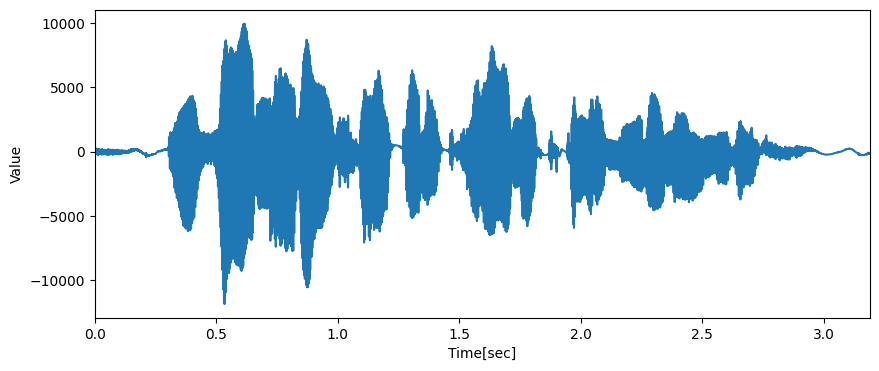

In [3]:
# check the wave form
import wave
import numpy as np
import matplotlib.pyplot as plt

with wave.open(data[0]) as wav:
  sampling_freq = wav.getframerate()
  sample_size = wav.getsampwidth()
  num_channels = wav.getnchannels()
  num_samples = wav.getnframes()
  waveform = wav.readframes(num_samples)
  waveform = np.frombuffer(waveform, dtype=np.int16)

print(f"sampling Frequency: {sampling_freq}[Hz]")
print(f"Sample Size: {sample_size}[Byte]")
print(f"Number of Channels: {num_channels}")
print(f"Number of Samples: {num_samples}")

time_axis = np.arange(num_samples) / sampling_freq
plt.figure(figsize=(10,4))
plt.plot(time_axis, waveform)
plt.xlabel("Time[sec]")
plt.ylabel("Value")
plt.xlim([0, num_samples/sampling_freq])
plt.savefig("outputs/voice.png")

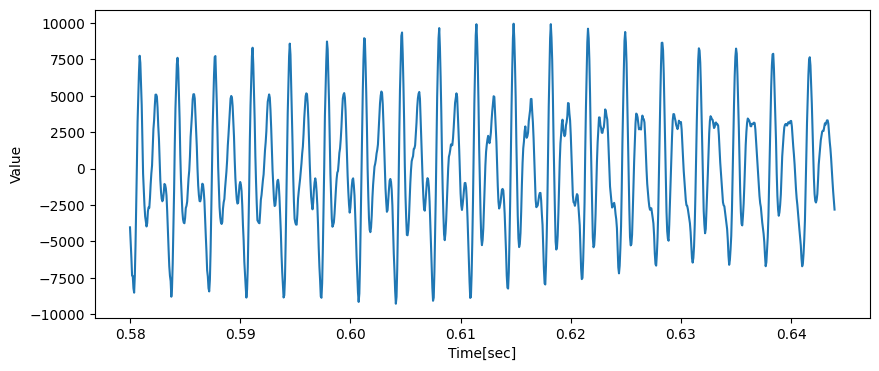

In [4]:
# select the time when she speak "o"
target_time = 0.58
fft_size = 1024
out_plot = 'outputs/spectrum.png'

# calc corresponded index number to target_time
target_index = int(target_time *sampling_freq)
# cut waveform
frame = waveform[target_index : target_index+fft_size]

# show target voice 
time_axis = np.arange(len(frame)) / sampling_freq + target_time
plt.figure(figsize=(10,4))
plt.plot(time_axis, frame)
plt.xlabel("Time[sec]")
plt.ylabel("Value")
plt.show()

In [5]:
# apply FFT to the target voice, and check spectrum
spectrum = np.fft.fft(frame)
print(spectrum)

[-34027.             +0.j         -23735.88174587+189483.53014267j
   1092.15998439 +83369.59946734j ...   1028.87305438 -54288.63658274j
   1092.15998439 -83369.59946734j -23735.88174587-189483.53014267j]


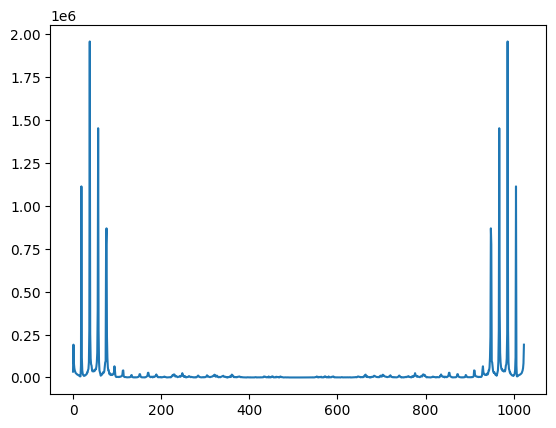

In [6]:
absolute = np.abs(spectrum)
plt.plot(absolute)
plt.show()

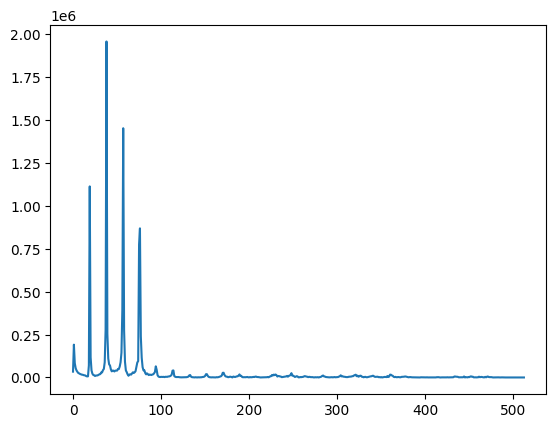

In [7]:
absolute = absolute[:int(len(absolute)/2+1)]
plt.plot(absolute)
plt.show()

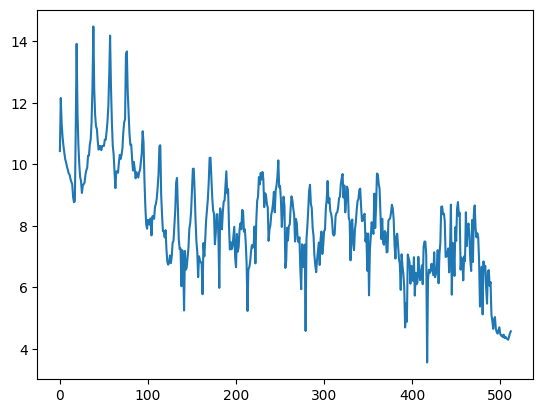

In [8]:
# calculate log-scaled absolute spectru617890=2345-` `
log_absolute = np.log(absolute + 1E-7)
plt.plot(log_absolute)
plt.show()

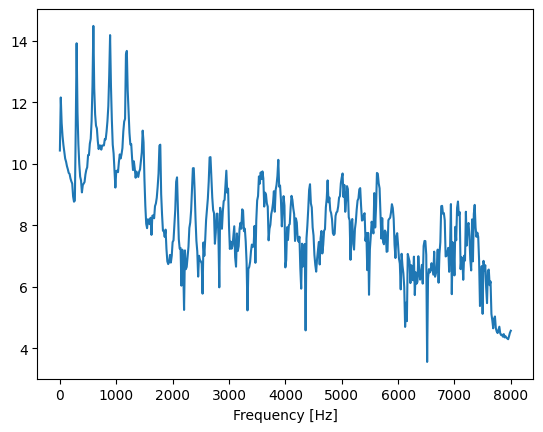

In [9]:
# show the spectrum as frequency
freqs = np.arange(int(fft_size/2+1)) * sampling_freq / fft_size
plt.plot(freqs, log_absolute)
plt.xlabel('Frequency [Hz]')
plt.show()

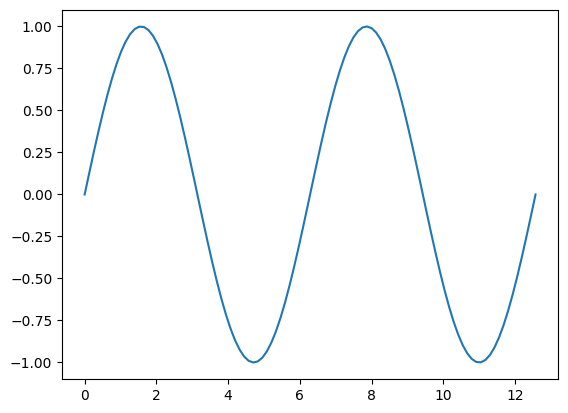

In [10]:
# check FFT performance
x = np.linspace(0, 4*np.pi, 100)
y = np.sin(x)
plt.plot(x,y)
plt.show()

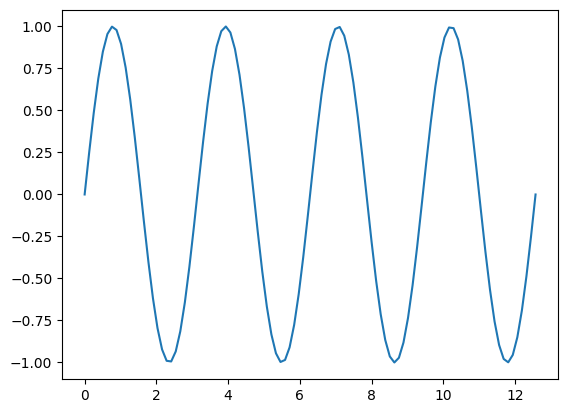

In [11]:
# check FFT performance
x = np.linspace(0, 4*np.pi, 100)
y = np.sin(2*x)
plt.plot(x,y)
plt.show()

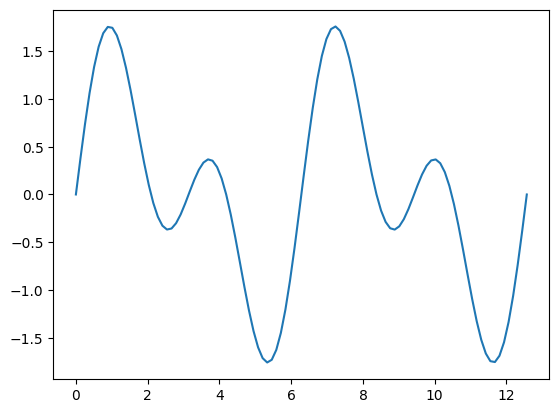

In [12]:
# check FFT performance
x = np.linspace(0, 4*np.pi, 100)
y = np.sin(x) + np.sin(2*x)
plt.plot(x,y)
plt.show()

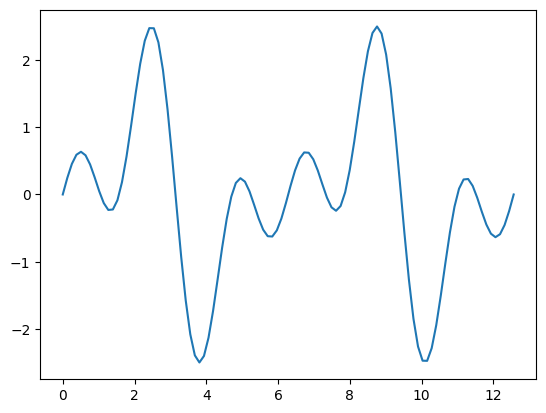

In [19]:
# check FFT performance
x = np.linspace(0, 4*np.pi, 100)
y = np.sin(x) - np.sin(2*x) + np.sin(3*x)
plt.plot(x,y)
plt.show()

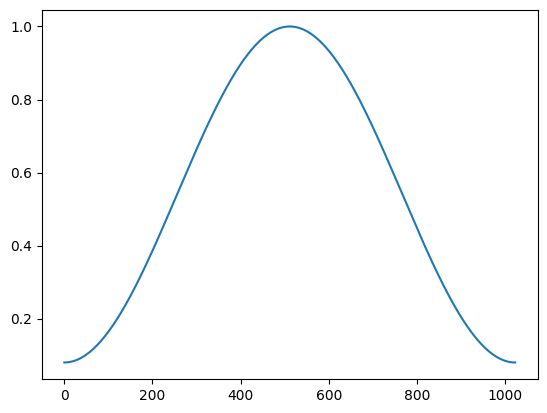

In [37]:
# hamming window
def hamming(N):
    def h(n, N):
        return 0.54 - 0.46 * np.cos(2*np.pi*n/(N-1))
    return [h(i,N) for i in range(N)]

x = np.arange(fft_size)
y = hamming(fft_size)
plt.plot(x,y)
plt.show()

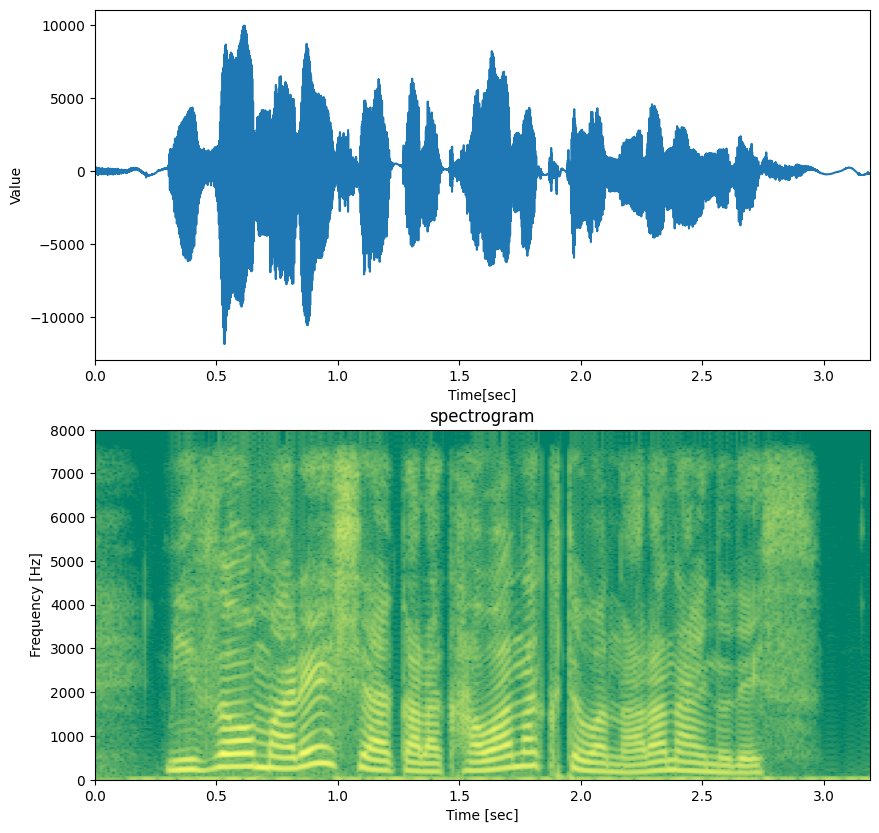

In [51]:
# create log-scaled spectrum
frame_size = 25 # milli second
frame_shift = 10
out_plot = 'outputs/sample_spectrum.png'

frame_size = int(sampling_freq * frame_size / 1000)
frame_shift = int(sampling_freq * frame_shift / 1000)

# get minimum fft size bigger than frame size
fft_size = 1
while fft_size<frame_size:
    fft_size*=2

# number of values of the target frame
num_frames = (num_samples - frame_size) // frame_shift + 1
spectrogram = np.zeros((num_frames, int(fft_size/2)+1))

for frame_idx in range(num_frames):
    start_index = frame_idx *frame_shift
    frame = waveform[start_index : start_index + frame_size].copy()
    # apply hamming window
    frame = frame * np.hamming(frame_size)
    spectrum = np.fft.fft(frame, n=fft_size)
    absolute = np.abs(spectrum)
    absolute = absolute[:int(len(absolute)/2+1)]
    log_absolute = np.log(absolute + 1E-7)
    
    spectrogram[frame_idx, :] = log_absolute

plt.figure(figsize=(10,10))

# plot raw wave
plt.subplot(2,1,1)
time_axis = np.arange(num_samples) / sampling_freq
plt.plot(time_axis, waveform)
plt.xlabel("Time[sec]")
plt.ylabel("Value")
plt.xlim([0, num_samples/sampling_freq])

# plot spectrogram
plt.subplot(2,1,2)
spectrogram -= np.max(spectrogram)
vmax = np.abs(np.min(spectrogram))*0.0
vmin = -np.abs(np.min(spectrogram))*0.7
plt.imshow(spectrogram.T[-1::-1,:], extent=[0,num_samples/sampling_freq,0,sampling_freq/2],cmap='summer',vmax=vmax,vmin=vmin,aspect='auto')
plt.title('spectrogram')
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')

plt.show()

In [ ]:
# dither function
def dither(noise):
    assert noise>0
    return 2*noise*np.random.rand()-noise

# DC cut function
def dc_cut(x):
    return x - np.mean(x)

# pre emphasis
def pre_emphasis(x):
    return np.convolve(x, [1, -0.97],mode='same')